<a href="https://colab.research.google.com/github/hajonghyun/inflearn_ML_from_the_foundation/blob/main/6_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---


# 선형회귀 이론 및 실습 # 6 Decision Tree


---
---



## velog 주소

https://velog.io/@changhtun1/Python-Decision-Tree-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5

## 유튜브 주소

https://youtu.be/OAg7vOFjVck?si=rPLVlwN58ZtPR1J3

## 연습 데이터 url

https://drive.google.com/drive/folders/149jcCyJFKKG5MFaPNWnYYqM2EkzgRz2P?usp=sharing


---
---


In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call

In [15]:
iris = load_iris()

In [16]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.data.shape

(150, 4)

In [19]:
# 꽃잎의 길이, 너비만 x로 사용하자.
x = iris.data[:,2:]
y = iris.target

In [20]:
# decision tree 모형 인스턴스 생성, 하이퍼파라미터 (depth=3)
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [21]:
export_graphviz(
    tree_model, # 학습한 모형
    out_file = './iris_tree_model.dot', # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','iris_tree_model.dot','-o','OutputFile.png'])

0

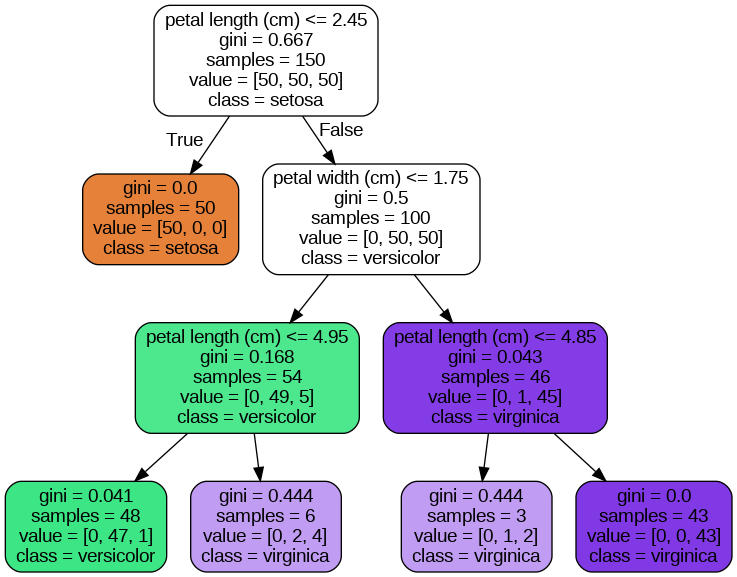

In [22]:
from IPython.display import Image
Image(filename='OutputFile.png')

In [23]:
# [[3.1,2]] 데이터에 대한 DecisionTree 클래스 예측
# 확률추정
tree_model.predict_proba([[3.1,2]])

array([[0.        , 0.33333333, 0.66666667]])

In [24]:
# 가장 높은 확률의 클래스로 예측
tree_model.predict([[3.1,2]])

array([2])

In [25]:
iris.target_names[tree_model.predict([[3.1,2]])[0]]

np.str_('virginica')

결정 트리의 규제 매개변수 종류
1. max_depth : 트리 최대 깊이
    - max_depth 감소 => 모델 규제 증가 => 적합 감소

2. min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
    - min_samples_split 증가 => 모델 규제 증가 => 과적합 감소

3. min_samples_leaf : leaf node가 가지고 있어야할 최소 샘플 수
    - min_samples_leaf 증가 => 모델 규제 증가 => 과적합 감소

4. min_weight_fraction_leaf :
    - min_samples_leaf와 비슷하지만, 가중치가 부여된 전체 샘플 수에서의 비율
    - min_weight_fraction_leaf 증가 => 모델 규제 증가 => 과적합 감소

5. max_leaf_nodes : leaf node의 총 최대 개수
    - max_leaf_nodes 감소 => 모델 규제 증가 => 과적합 감소

6. max_features : 최상의 분할을 찾을 때 고려할 기능의 수
    - max_features 감소 => 모델 규제 증가 => 과적합 감소

```
TIP : min_으로 시작하는 매개변수 증가 => 모델 규제 증가 => 과적합 감소
TIP : max_으로 시작하는 매개변수 감소 => 모델 규제 증가 => 과적합 감소
```

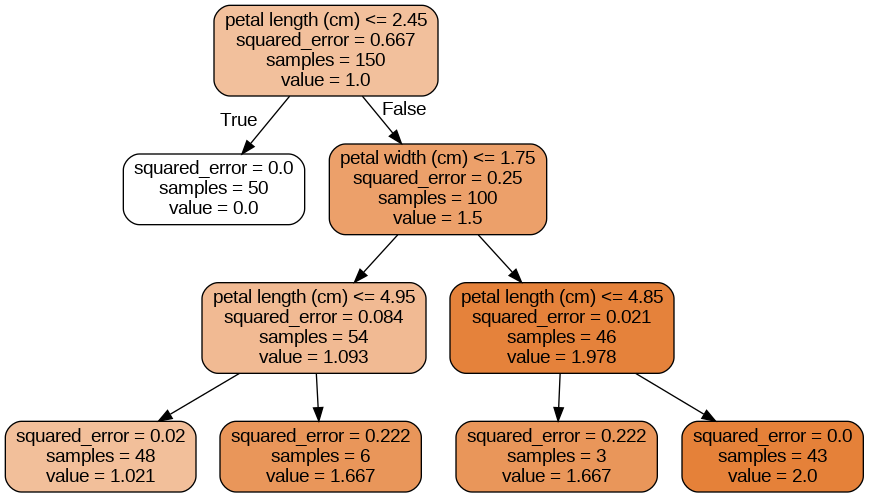

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(x,y)

export_graphviz(
    tree_model, # 학습한 모형
    out_file = './iris_tree_model_reg.dot', # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
check_call(['dot','-Tpng','iris_tree_model_reg.dot','-o','OutputFile_reg.png'])
Image(filename='OutputFile_reg.png')